This notebook is created to run a chemical diversity analysis of the filtered dataset. The goal is to investigate whether there is enough diversity in the initial dataset, in order to proceed with MS2LDA runs and then motif curation.

NPClassifier predictions of COCONUT compounds are stored in a tsv file that can be found here: https://zenodo.org/records/10629838

In [3]:
predictions = '/home/ioannis/thesis_data/coconut_predictions.tsv'

In [4]:
import pandas as pd
predictions_df = pd.read_csv(predictions, sep='\t')
print(predictions_df.head(10))

   0  coconut_id                                             smiles  \
0  0  CNP0000002  CC=C(N=CS)C(=O)OC1C(COC(C)=O)OC(C2(O)CC(=O)C(N...   
1  1  CNP0000003  COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...   
2  2  CNP0000004  COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...   
3  3  CNP0000005  CC1(C)CC2C(OC(=O)c3ccccc3)C(OC(=O)c3ccccc3)CC(...   
4  4  CNP0000006  COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(O)c5c4C(...   
5  5  CNP0000007                      CC1OC(=O)C2(C(C)CCC(O)C2O)C1O   
6  6  CNP0000008  CC(=O)Oc1cc(C)cc2c1C(=O)OC1C(OC(C)=O)C=CC3c4c(...   
7  7  CNP0000009  CC(=O)OCCC1(C)CC(OC(C)=O)C(OC(C)=O)C2CC(C)(C)CC21   
8  8  CNP0000010                  CC1(C)CC2C(O)C(=O)CC(C)(CC=O)C2C1   
9  9  CNP0000011  COc1cccc2c1C(=O)c1c(OC)cc3c(c1C2=O)C1C=CC(=O)C...   

  prediction_pathway            prediction_superclass  \
0      Carbohydrates                              NaN   
1        Polyketides  Polycyclic aromatic polyketides   
2        Polyketides  Polycyclic aromatic polyk

In [ ]:
from rdkit import Chem
from rdkit.Chem import inchi
def smiles_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return inchi.MolToInchiKey(mol)     
    except:
        return None

In [7]:
predictions_df['inchikey'] = predictions_df['smiles'].apply(smiles_to_inchikey)
print(predictions_df.head(10))

[11:34:24] Explicit valence for atom # 20 N, 5, is greater than permitted
[11:34:33] Unusual charge on atom 66 number of radical electrons set to zero
[11:34:34] Explicit valence for atom # 11 P, 5, is greater than permitted
[11:34:37] Explicit valence for atom # 5 S, 6, is greater than permitted
[11:34:45] WARNING: not removing hydrogen atom without neighbors
[11:34:45] WARNING: not removing hydrogen atom without neighbors
[11:34:51] WARNING: not removing hydrogen atom without neighbors
[11:34:51] WARNING: not removing hydrogen atom without neighbors
[11:34:54] WARNING: not removing hydrogen atom without neighbors
[11:34:54] WARNING: not removing hydrogen atom without neighbors
[11:34:54] WARNING: not removing hydrogen atom without neighbors
[11:34:54] WARNING: not removing hydrogen atom without neighbors
[11:34:54] Explicit valence for atom # 19 S, 6, is greater than permitted
[11:34:54] Explicit valence for atom # 1 S, 6, is greater than permitted
[11:35:01] WARNING: not removing hy

   0  coconut_id                                             smiles  \
0  0  CNP0000002  CC=C(N=CS)C(=O)OC1C(COC(C)=O)OC(C2(O)CC(=O)C(N...   
1  1  CNP0000003  COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...   
2  2  CNP0000004  COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...   
3  3  CNP0000005  CC1(C)CC2C(OC(=O)c3ccccc3)C(OC(=O)c3ccccc3)CC(...   
4  4  CNP0000006  COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(O)c5c4C(...   
5  5  CNP0000007                      CC1OC(=O)C2(C(C)CCC(O)C2O)C1O   
6  6  CNP0000008  CC(=O)Oc1cc(C)cc2c1C(=O)OC1C(OC(C)=O)C=CC3c4c(...   
7  7  CNP0000009  CC(=O)OCCC1(C)CC(OC(C)=O)C(OC(C)=O)C2CC(C)(C)CC21   
8  8  CNP0000010                  CC1(C)CC2C(O)C(=O)CC(C)(CC=O)C2C1   
9  9  CNP0000011  COc1cccc2c1C(=O)c1c(OC)cc3c(c1C2=O)C1C=CC(=O)C...   

  prediction_pathway            prediction_superclass  \
0      Carbohydrates                              NaN   
1        Polyketides  Polycyclic aromatic polyketides   
2        Polyketides  Polycyclic aromatic polyk

In [13]:
total_rows = predictions_df.shape[0]
print('Number of rows: ', total_rows)

Number of rows:  407029


Now I want to check how many inchikeys were not formed.

In [12]:
missing_inchikeys = predictions_df['inchikey'].isna().sum()
print('Number of missing inchikeys: ', missing_inchikeys)

Number of missing inchikeys:  6


Since only 6 inchikeys could not be formed from SMILES, it is safe to just drop these 6 compounds.

In [15]:
predictions_df = predictions_df.dropna(subset= ['inchikey'])

Now that there is an inchikey for each smiles, the comparison between the tsv file from coconut and the mgf files can be done.

In [17]:
from matchms.importing import load_from_mgf
spectra_pos = list(load_from_mgf('/home/ioannis/thesis_data/msn_positive_filtered.mgf'))
spectra_neg = list(load_from_mgf('/home/ioannis/thesis_data/msn_negative_filtered.mgf'))


In [19]:
print(len(spectra_pos))
print(len(spectra_neg))

132736
86709


In the dataset there are a lot of spectra that share the same inchikey, but have different adducts or collision energy. For chemical class discovery though, only the inchikey is important at this step, so we will work only with the unique inchikeys.

In [23]:
inchikeys_pos = []
for s in spectra_pos:
    inchikey_pos = s.get('inchikey')
    inchikeys_pos.append(inchikey_pos)
unique_inchikeys = set(inchikeys_pos)
print('Number of unique inchikeys_pos in the positive spectra: ', len(unique_inchikeys))
print('Total number of inchikeys in the positive spectra', len(spectra_pos))

Number of unique inchikeys_pos in the positive spectra:  41568
Total number of inchikeys in the positive spectra 132736


Now the goal is to compare the unique_inchikeys with the inchiques from NPClassifier predictions of COCONUT compounds to get the classification information if that is available.

In [25]:
filtered_predictions = predictions_df[predictions_df["inchikey"].isin(unique_inchikeys)]
print(f"Matched compounds: {filtered_predictions.shape[0]}")

Matched compounds: 2337


The number of the matched inchikeys is low. There could be some differences due to the filtering tha has been done for the creation of the mgf file. For that reason, maybe it is better to search matches for the inchikey-prefixes that do not focus on stereochemistry and protonation.

In [29]:
records = []
for spectrum in spectra_pos:
    metadata = spectrum.metadata
    records.append({
        "feature_id": metadata.get("feature_id"),
        "smiles": metadata.get("smiles"),
        "inchikey": metadata.get("inchikey"),
    })

mgf_df = pd.DataFrame(records)


In [30]:
def get_inchikey_prefix(inchikey):
    try:
        return inchikey.split("-")[0]
    except:
        return None
    
# Taking the prefix of the inchikey from the spectra of the mgf file
mgf_df["inchikey_prefix"] = mgf_df["inchikey"].apply(get_inchikey_prefix)
# Doing the same but for the tsv file with the NPClassifier predictions
predictions_df["inchikey_prefix"] = predictions_df["inchikey"].apply(get_inchikey_prefix)

#Find the common inchikey prefixes between the two file
matched_predictions = predictions_df[predictions_df["inchikey_prefix"].isin(mgf_df["inchikey_prefix"])]
print(f"Prefix-matched compounds: {matched_predictions.shape[0]}")


Prefix-matched compounds: 5577


In [31]:
print(matched_predictions.head(10))

         0  coconut_id                                             smiles  \
1218  1218  CNP0001246           CC(C)n1cnc2c(NCc3cccc(C(F)(F)F)c3)ncnc21   
1298  1298  CNP0001326                         CCCCCCCCCCCCCCCC(O)=NC(C)C   
1531  1531  CNP0001727                    CC(NC(C)(C)CO)C(=O)c1cccc(Cl)c1   
1827  1827  CNP0002333               CC(O)=Nc1ccn(C2OC(CO)C(O)C2O)c(=O)n1   
1838  1838  CNP0002345                  Cn1cnc2c(ncn2C2OC(CO)C(O)C2O)c1=O   
1841  1841  CNP0002348                    COc1ccc2[nH]cc(CC(N)C(=O)O)c2c1   
1848  1848  CNP0002356                                N=c1nc(O)cc(N)[nH]1   
2121  2121  CNP0002648  CC1(C)CCC2(C(=O)OC3OC(CO)C(O)C(O)C3O)CCC3(C)C(...   
2216  2216  CNP0002757                           CCN=C(O)C1CC(C)CCC1C(C)C   
2218  2218  CNP0002759  CC1(C(=O)O)CCC2(C)CCC3(C)C(=CC(=O)C4C5(C)CCC(O...   

            prediction_pathway prediction_superclass  \
1218                 Alkaloids       Pseudoalkaloids   
1298               Fatty acids          

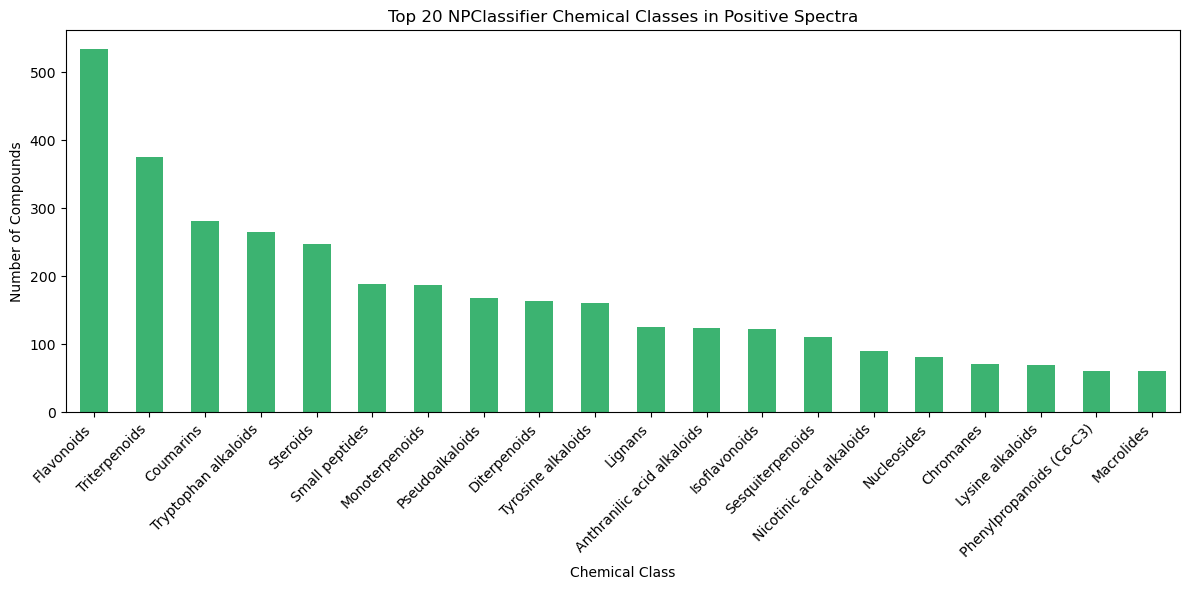

In [38]:
import matplotlib.pyplot as plt

# Count the top 20 chemical classes
class_counts = matched_predictions["prediction_superclass"].value_counts().head(20)

# Plot
plt.figure(figsize=(12, 6))
class_counts.plot(kind="bar", color="mediumseagreen")
plt.title("Top 20 NPClassifier Chemical Classes in Positive Spectra")
plt.xlabel("Chemical Class")
plt.ylabel("Number of Compounds")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Now the same procedure is done for the negative spectra as well.

In [35]:
inchikeys_neg = []
for s in spectra_neg:
    inchikey_neg = s.get('inchikey')
    inchikeys_neg.append(inchikey_neg)
unique_inchikeys_neg = set(inchikeys_neg)
print('Number of unique inchikeys_pos in the negative spectra: ', len(unique_inchikeys_neg))
print('Total number of inchikeys in the negative spectra', len(spectra_neg))

Number of unique inchikeys_pos in the negative spectra:  23838
Total number of inchikeys in the negative spectra 86709


In [36]:
records_neg = []
for spectrum in spectra_neg:
    metadata = spectrum.metadata
    records_neg.append({
        "feature_id": metadata.get("feature_id"),
        "smiles": metadata.get("smiles"),
        "inchikey": metadata.get("inchikey"),
    })

mgf_df_neg = pd.DataFrame(records_neg)

In [37]:
# Taking the prefix of the inchikey from the spectra of the mgf file
mgf_df_neg["inchikey_prefix"] = mgf_df_neg["inchikey"].apply(get_inchikey_prefix)

#Find the common inchikey prefixes between the two file
matched_predictions_neg = predictions_df[predictions_df["inchikey_prefix"].isin(mgf_df_neg["inchikey_prefix"])]
print(f"Prefix-matched compounds: {matched_predictions_neg.shape[0]}")


Prefix-matched compounds: 5046


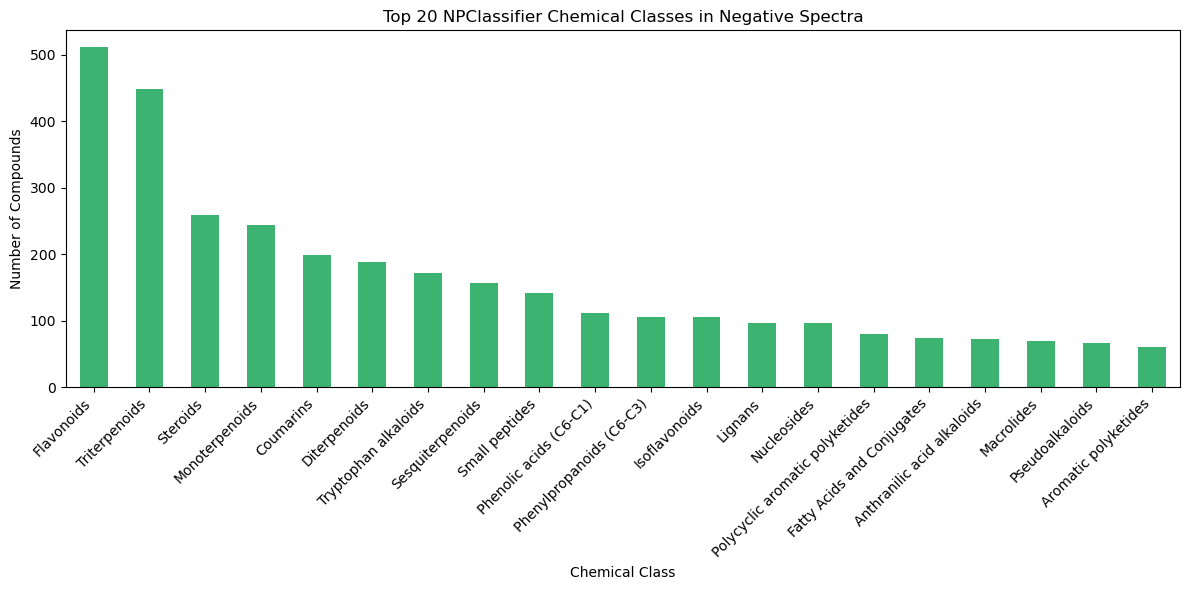

In [39]:
# Count the top 20 chemical classes
class_counts_neg = matched_predictions_neg["prediction_superclass"].value_counts().head(20)

# Plot
plt.figure(figsize=(12, 6))
class_counts_neg.plot(kind="bar", color="mediumseagreen")
plt.title("Top 20 NPClassifier Chemical Classes in Negative Spectra")
plt.xlabel("Chemical Class")
plt.ylabel("Number of Compounds")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()